In [59]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
from pathlib import Path


['sample_submission.csv', 'train_relationships.csv', 'train', 'test']


In [60]:
train_dataFrame = pd.read_csv("../input/train_relationships.csv")
trainset = Path('../input/train/')

In [61]:
print(train_dataFrame.head())

           p1          p2
0  F0002/MID1  F0002/MID3
1  F0002/MID2  F0002/MID3
2  F0005/MID1  F0005/MID2
3  F0005/MID3  F0005/MID2
4  F0009/MID1  F0009/MID4


by running the train_dataFrame.head() we can know about the kin relationship of parents(father/mother) considered as p1 and the respective child is directed towards p2 ( p1(father & mother) is mapped to child 

For Example compare the viewColumnFrames ( i.e P1 and P2 ) with train.csv files to get insights

Note F000X is a family and in which MID1 , MID2 corrosponds to the same family member


In [62]:
print(train_dataFrame.p1[0])

F0002/MID1


In [63]:
train_dataFrame.shape

(3598, 2)

Note: My DataFrame has 3598 rows and 2 columns

In [64]:
find = list(train_dataFrame.p1)
#print(len(find))

find_child = list(train_dataFrame.p2)
#print(len(find_child))

temp = find + find_child

#print(temp)

#using set to remove redundancies (duplicates) in a list

store_list = list(set(temp)) # we wanna sort the list so wrapping up with list(set())

store_list.sort() 

print(store_list[:5])


['F0002/MID1', 'F0002/MID2', 'F0002/MID3', 'F0005/MID1', 'F0005/MID2']


In [65]:
#our mission is to find the missing directory 
#print(trainset)
count = 0 
modify_dir = []

for a in store_list:
    #print(a)
    if(os.path.exists(trainset/a)==False):
        #print(a)
        modify_dir.append(a)
        count = count+1

print("blacksheeps :",count)
print("missing directories" , len(modify_dir))

blacksheeps : 96
missing directories 96


I ve counted the number of files which are acting as dummies , ( it can be verifiable with train_dataset.csv and images we are provided with)

Yes I understood train.csv is pretty much loaded with dummies ( 96 directories ) but no source files while comparable with train.zip ( bunch of MID files)


**Remove the useless directories in train.zip by comparing with the train.csv**

In [66]:
train_dataFrame = train_dataFrame[~train_dataFrame["p1"].isin(modify_dir)]
train_dataFrame = train_dataFrame[~train_dataFrame["p2"].isin(modify_dir)]
print(train_dataFrame.shape)
#len(train_dataFrame)

(3362, 2)


In [67]:
find = list(train_dataFrame.p1)

find_child = list(train_dataFrame.p2)


temp = find + find_child

#print(temp)

#using set to remove redundancies (duplicates) in a list

final_folder = list(set(temp)) # we wanna sort the list so wrapping up with list(set())

final_folder.sort() 


In [68]:
final_folder[:5]

['F0002/MID1', 'F0002/MID2', 'F0002/MID3', 'F0005/MID1', 'F0005/MID2']

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import * 

In [70]:

def imshow(label):
    #print(int(store_list[label]))
    fetch_img = os.listdir(trainset/final_folder[label])
    #print(len(fetch_img))
    total_img = len(fetch_img)
    
    fig,ax = plt.subplots(2,5,figsize=(20,10))
    print(ax.shape)
    
    for iterator in range(total_img):
        # specifying the exact location and displaying all the pictures in the present directory 
        with open (trainset/final_folder[label]/fetch_img[iterator] , 'rb') as f :
            get_img = Image.open(f)
            ax[iterator%2][iterator//2].imshow(get_img)
        fig.show()
    

Time to visualize lets see the image of family 

* p1[0] seems to be 0 th directory MID2 ( same family folder)
* p1[1] seems to be 1 st directory of MID2
* p2[0] seems to be 0 th directory ( child mapped to p1[0] and p1[1]

(2, 5)


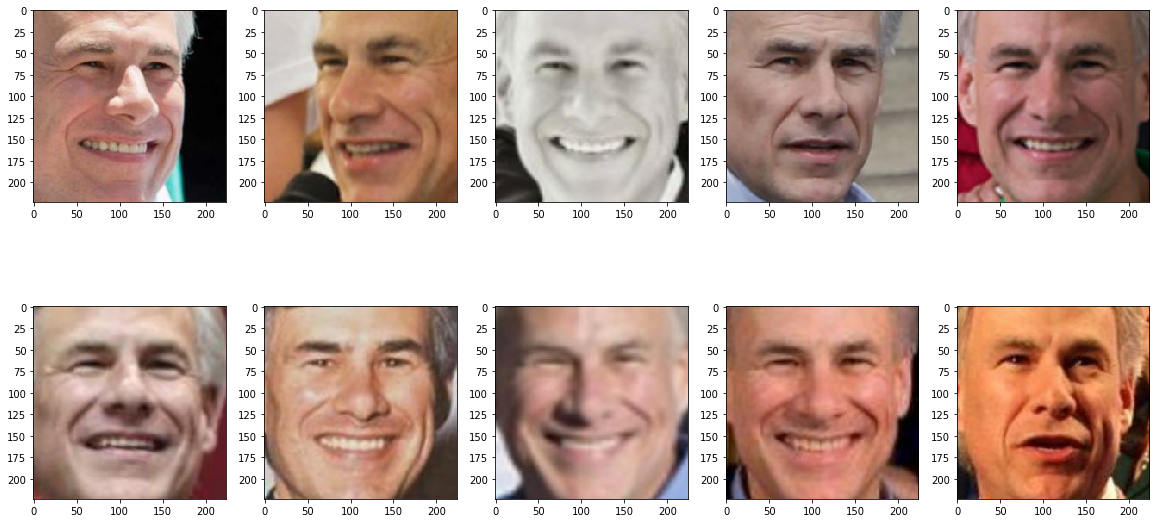

In [71]:
imshow(0)   # imshow indicates train_dataFrame.p1[0]

(2, 5)


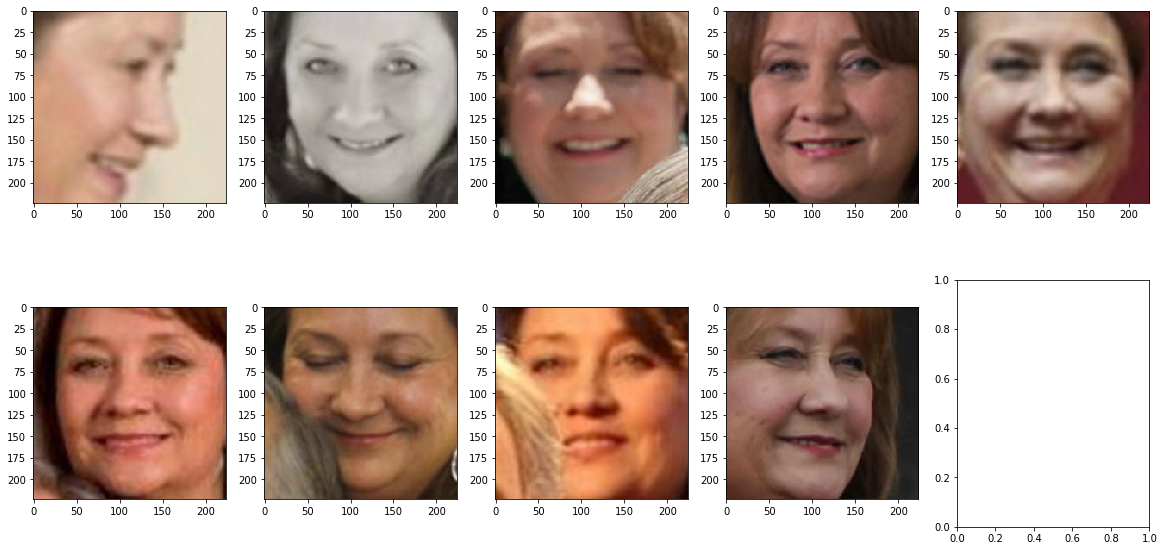

In [72]:
imshow(1)

(2, 5)


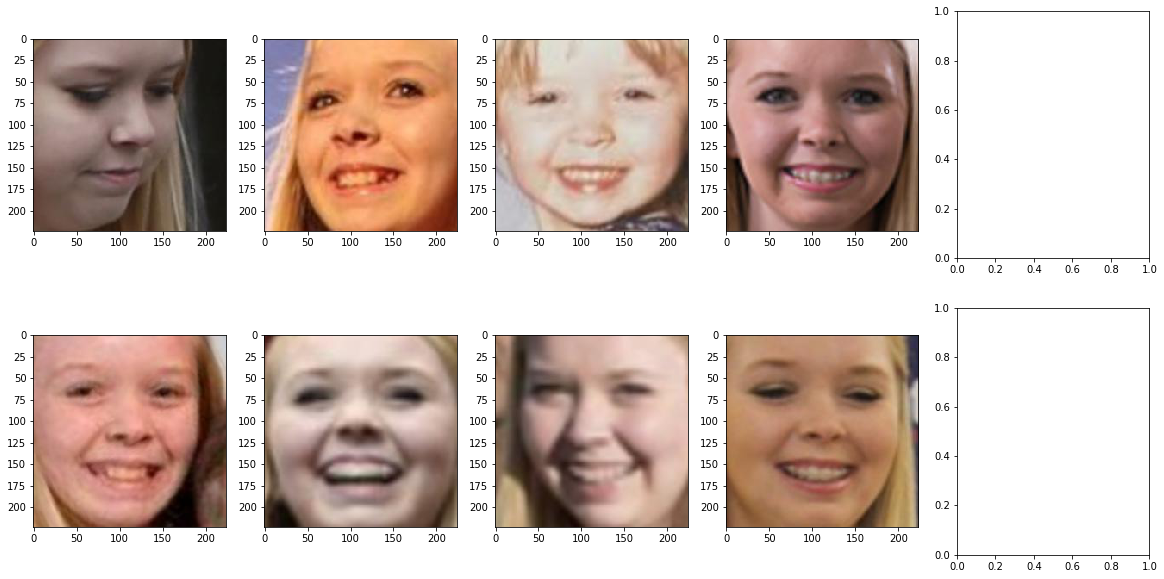

In [73]:
imshow(2)

In [74]:
from glob import glob

In [75]:
trainset = "../input/train/"


In [76]:
sample_directory = "F07"
all_images = glob(trainset + "/*/*/*.jpg")

train_images = [x for x in all_images if sample_directory not in x]
val_images = [x for x in all_images if sample_directory in x]


#print(len(train_images))
#print(len(val_images))
#print(train_images)
from collections import defaultdict
train_map = defaultdict(list)

for x in train_images:
    train_map[x.split("/")[-3] + "/" + x.split("/")[-2]].append(x)
 
val_map = defaultdict(list)

for x in val_images:
    val_map[x.split("/")[-3] + "/" + x.split("/")[-2]].append(x)

    
    
check = [x.split("/")[-3] +"/"+ x.split("/")[-2] for x in all_images]
#print(check)
phase = pd.read_csv("../input/train_relationships.csv")
phase = list(zip(phase.p1.values,phase.p2.values))
phase = [x for x in phase if x[0] in check and x[1] in check ]
#print(phase)

train_pair = [x for x in phase if sample_directory not in x[0]]
val_pair = [x for x in phase if sample_directory in x[0]]
print("train pair",len(train_pair))
print("valid_pair",len(val_pair))
#print(len(train_pair))
#al_pair = 


train pair 2965
valid_pair 397


In [77]:
#print(val_images)

In [78]:

    
#print(train_map)


In [79]:
train_images = [x for x in all_images if sample_directory not in x]
#print(train_images)



In [80]:
#train_map.items()

In [81]:
###for key,value in train_map.items():
    #print("key",key,end="") #key represents the directory
    #print("value",value) #value unpacks the number of files resided
   ## print(train_map[key]) ### similar to the values obtained 

In [82]:

    
#print(val_map)

In [83]:
all_dict = {}

print(len(final_folder))
#for x in final_folder:
#    print(x)

2288


In [84]:
import torch
import torchvision
import torchvision.transforms as transforms
from pathlib import Path

import torch.nn as nn
import torch.nn.functional as F


In [85]:
from torch.utils.data import DataLoader,Dataset
from torchvision.models import *
import torchvision.transforms as transforms
import torchvision.utils
import torchvision.datasets as datasets

In [86]:
import random

In [87]:
### TESTING THE LOADING IMAGE LABELS FOR PHASE( TRAIN_IMAGES / TEST IMAGES ) AND THE IMGDATA


In [88]:
#show = load_image_labels(imgdata = data_folder,phase = train_images,transforms = data_transforms['train_transf'])

#print(len(show))
#print(show.phase[2])
#print(show.imgdata[2])

#print(show.transforms)

#print(load_image_labels(data_folder,train_images))
#print(show.find_relations)



#print(show_all)

In [89]:
#load_train = load_image_labels(imgdata = data_folder,phase = train_images,transforms = data_transforms['train_transf'])

#train_data = datasets.ImageFolder(data_folder,train_images,data_transforms['train_transf'])

#valid_data = datasets.ImageFolder(val_images,transform = data_transforms['valid_transf'])

#trainloader = torch.utils.data.DataLoader(load_train,shuffle = True , num_workers = 8 ,batch_size = batch_size)

In [90]:
data_dir = '../input/train'

print(data_dir)

data_folder = datasets.ImageFolder(root = "../input/train/")
print(data_folder)

../input/train
Dataset ImageFolder
    Number of datapoints: 12379
    Root location: ../input/train/


In [91]:
batch_size = 64
num_workers = 8


data_transforms = {
    
    'train_transf' : transforms.Compose([transforms.Resize((64,64)),
                                         transforms.RandomResizedCrop(64),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
                                         
                                        ]),
    'valid_transf':transforms.Compose([transforms.Resize((64,64)),
                                       transforms.RandomSizedCrop(64),
                                       transforms.RandomHorizontalFlip(),
                                        transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225]),
                                        ])
}

/opt/conda/lib/python3.6/site-packages/torchvision/transforms/transforms.py:694: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")


In [92]:
 #val_pair

In [93]:
class load_image_labels(Dataset):
        def __init__(self,imgdata,phase,transforms):
            self.imgdata = imgdata
            self.phase = phase
            self.transforms = transforms 
            
        def __getitem__(self,index):
            
            load_img1 = self.phase[index][0]
            #print(load_img1)
            
            loadimg1_path = glob("../input/train/"+load_img1+"/*.jpg") 
            loadimg1_path = random.choice(loadimg1_path)
            #print(loadimg1_path)
            # it is used to trace the relations whether the image files under the directory is related to specified person
            find_relations = [go for go in self.phase if go[0] == load_img1 or go[1] == load_img1]
            
            #print(find_relations)
            
            same_class = 1
            #print(get_img1)    
            if find_relations == []:
                same_class = 0
            else:
                same_class = random.randint(0,1)
            
            if same_class == 1 : 
                load_img2 = random.choice(find_relations)
                
                if load_img2[0] != load_img1 :
                    load_img2 = load_img2[0]
                
                else:
                    load_img2 = load_img2[1]
                
                loadimg2_path = glob("../input/train/"+load_img2+"/*.jpg")
                loadimg2_path = random.choice(loadimg2_path)
                
            else:
                randy = True
                
                while randy:
                    loadimg2_path = random.choice(self.imgdata.imgs)[0]
                    load_img2_info = loadimg2_path.split("/")[-3]+"/"+loadimg2_path.split("/")[-2]
                    randy = False
                    
                    for check in find_relations:
                        if check[0] == load_img2_info or check[1] ==load_img2_info:
                            randy = True
                            break
            #print(loadimg2_path)
            #print(get_img1)
            #get_img1 = Image.open("../input/train/F0733/MID2/P07682_face1.jpg")
            get_img1 = Image.open(loadimg1_path) 
            get_img2 = Image.open(loadimg2_path)
            #get_img2 = Image.open("../input/train/F0733/MID5/P07690_face2.jpg")
            
            if self.transforms is not None:
                get_img1 = self.transforms(get_img1)
                get_img2 = self.transforms(get_img2)
                
            return get_img1,get_img2,same_class
        
        def __len__(self):
            return len(self.phase)

In [94]:
load_train = load_image_labels(imgdata = data_folder,phase = train_pair,transforms = data_transforms['train_transf'])

#train_data = datasets.ImageFolder(data_folder,train_images,data_transforms['train_transf'])

#valid_data = datasets.ImageFolder(val_images,transform = data_transforms['valid_transf'])

trainloader = torch.utils.data.DataLoader(load_train,shuffle = True , num_workers = num_workers ,batch_size = batch_size)


#valid_data = datasets.ImageFolder(val_images,transform = data_transforms['valid_transf'])
#validloader = DataLoader(valid_data , shuffle = True , num_workers = 8 , batch_size = batch_size)

load_valid = load_image_labels(data_folder,val_pair,data_transforms['valid_transf'])
valloader = DataLoader(load_valid,shuffle = True , num_workers = num_workers ,batch_size = batch_size)

In [95]:
class architecture(nn.Module):
    def __init__(self):
        super(architecture, self).__init__()
        self.features = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(3, 64, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),
            nn.Dropout2d(p=.25), 
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(64,16, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(16),
            nn.Dropout2d(p=.25),
            
            nn.ReflectionPad2d(1),
            nn.Conv2d(16,8, kernel_size=3),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(8),
            nn.Dropout2d(p=.25),
            )
        
        self.fc1 = nn.Linear(2*8*64*64,300)
        self.fc2 = nn.Linear(300,100)
        self.fc3 = nn.Linear(100,2)

    def forward(self,x1,x2):
        outp1 = self.features(x1)
        outp1 = outp1.view(outp1.size()[0],-1)
        outp2 = self.features(x2)
        outp2 = outp2.view(outp2.size()[0],-1)
        
        outp = torch.cat((outp1, outp2),1)
        outp = F.relu(self.fc1(outp))
        #print("final outp 1 shape",outp.shape)
        outp = F.relu(self.fc2(outp))
        #print("final outp 1 shape",outp.shape)
        outp = self.fc3(outp)
        #print("final outp 1 shape",outp.shape)
        return outp

In [96]:
model = architecture()
print(model)

architecture(
  (features): Sequential(
    (0): ReflectionPad2d((1, 1, 1, 1))
    (1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
    (2): ReLU(inplace=True)
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropout2d(p=0.25, inplace=False)
    (5): ReflectionPad2d((1, 1, 1, 1))
    (6): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU(inplace=True)
    (8): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Dropout2d(p=0.25, inplace=False)
    (10): ReflectionPad2d((1, 1, 1, 1))
    (11): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
    (12): ReLU(inplace=True)
    (13): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Dropout2d(p=0.25, inplace=False)
  )
  (fc1): Linear(in_features=65536, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=2, bias=Tru

In [97]:
#model = models.resnet50(pretrained=True)

In [98]:
#print(model)

In [99]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(),lr=0.008,momentum=0.8)


In [100]:
valid_min_loss = np.Inf

In [101]:
from torch import cuda

In [102]:
gpu_on = torch.cuda.is_available()
print(gpu_on)
if gpu_on:
    model.cuda()

True


for i,data in enumerate(trainloader,0):
    img1 ,img2,target = data
    print(img1)
    print(img2)
    print(data)

In [103]:
#print(img1.size())

In [104]:
#print(img2.size())

In [105]:
#print(target.size())

In [106]:
epoch = 20

In [107]:
for epoch in range(1,epoch+1):
    
    train_loss_calc = 0.0
    valid_loss_calc = 0.0
    
    model.train()
    
    for i,data in enumerate(trainloader,0):
        img1 ,img2 ,target = data
        #print(img1.size())
        #print(img2.size())
        #print(target.size())
        if gpu_on:
            img1,img2,target = img1.cuda(),img2.cuda(),target.cuda()
        else:
            img1,img2,target = img1.cpu(),img2.cpu(),target.cpu()
            
        optimizer.zero_grad()
        
        outp = model.forward(img1,img2)
        
        loss = criterion(outp,target)
        
        loss.backward()
        
        optimizer.step()
        
        train_loss_calc += loss.item()
        
        ########### Validation Part #################
        
        model.eval()
        total_val = 0
        correct_val = 0
    with torch.no_grad():
        for iterator,data in enumerate(valloader,0):
            if gpu_on:
                img1,img2,target = data 
                img1,img2,target = img1.cuda(),img2.cuda(),target.cuda()
                optimizer.zero_grad()
                outp = model.forward(img1,img2)
                loss = criterion(outp,target)

                valid_loss_calc += loss.item()
                _,predicted = torch.max(outp,1)

                total_val += target.size(0)
                correct_val += (predicted == target).sum().item()
    print("epoch: ",epoch,end=" ")
    print('accuracy: %d %%' % (100 * correct_val / total_val))    

epoch:  1 accuracy: 50 %
epoch:  2 accuracy: 47 %
epoch:  3 accuracy: 55 %
epoch:  4 accuracy: 58 %
epoch:  5 accuracy: 54 %
epoch:  6 accuracy: 61 %
epoch:  7 accuracy: 55 %
epoch:  8 accuracy: 62 %
epoch:  9 accuracy: 53 %
epoch:  10 accuracy: 55 %
epoch:  11 accuracy: 57 %
epoch:  12 accuracy: 61 %
epoch:  13 accuracy: 62 %
epoch:  14 accuracy: 59 %
epoch:  15 accuracy: 53 %
epoch:  16 accuracy: 55 %
epoch:  17 accuracy: 57 %
epoch:  18 accuracy: 59 %
epoch:  19 accuracy: 60 %
epoch:  20 accuracy: 58 %


In [108]:
collect_td = pd.read_csv("../input/sample_submission.csv")
print(collect_td.head())
#Before sample subm

                      img_pair  is_related
0  face05508.jpg-face01210.jpg           0
1  face05750.jpg-face00898.jpg           0
2  face05820.jpg-face03938.jpg           0
3  face02104.jpg-face01172.jpg           0
4  face02428.jpg-face05611.jpg           0


In [109]:
class generalizeTest(Dataset):
    
    def __init__(self,transform):
        self.collect_td = pd.read_csv("../input/sample_submission.csv")
        self.transform = transform
        
    def __getitem__(self,key):
        #note that img_pair is dataFrame Column name
        img1relate = self.collect_td.iloc[key].img_pair.split("-")[0] ### person1 
        
        img2relate = self.collect_td.iloc[key].img_pair.split("-")[1] ### person 2 
        
        img1 = Image.open("../input/test/"+img1relate) 
        img2 = Image.open("../input/test/"+img2relate)
        
        if self.transform is not None:
            img1 = self.transform(img1)
            img2 = self.transform(img2)
            
        return img1,img2
    
    def __len__(self):
        return len(self.collect_td) 
        

In [110]:
testing_data = generalizeTest(transform=data_transforms['valid_transf'])
test_set = DataLoader(testing_data,shuffle=False,batch_size = 4)

In [111]:
#sample submissision
collect_td = pd.read_csv("../input/sample_submission.csv")
bloody = []
with torch.no_grad():
    for data in test_set:
        img1,img2 = data 
        img1,img2 = img1.cuda(),img2.cuda()
        #optimizer.zero_grad()
        outp = model(img1,img2)
        _,predicted = torch.max(outp,1)
        #print(predicted)
        bloody = np.concatenate((bloody,predicted.cpu().numpy()),0)
collect_td['is_related'] = bloody 

In [112]:
print(collect_td.head())

                      img_pair  is_related
0  face05508.jpg-face01210.jpg         0.0
1  face05750.jpg-face00898.jpg         1.0
2  face05820.jpg-face03938.jpg         0.0
3  face02104.jpg-face01172.jpg         1.0
4  face02428.jpg-face05611.jpg         1.0


In [113]:
collect_td.to_csv('submission.csv')

In [114]:
collect_td.head()

,img_pair,is_related
0,face05508.jpg-face01210.jpg,0.0
1,face05750.jpg-face00898.jpg,1.0
2,face05820.jpg-face03938.jpg,0.0
3,face02104.jpg-face01172.jpg,1.0
4,face02428.jpg-face05611.jpg,1.0


In [115]:
from IPython.display import FileLink
FileLink('submission.csv')

/kaggle/working/submission.csv